1 Aprendizaje supervisado
==

PASO 1: Regresión Líneal
==

El método de regresión lineal consiste en identificar con precisión una línea que sea capaz de representar la distribución de puntos en un plano bidimensional. Dada la siguiente ecuación de la recta:
$y=  (y_2-y_1)/(x_2-x_1 )*(x-x_1 )+y_{1}=  (y_2-y_1)/(x_2-x_1 )*x+(y_{1}-(y_2-y_1)/(x_2-x_1 )*x_1 )$

$y=α*x+β$

In [1]:
import pandas as pd
import numpy as np

# Leemos el archivo usando pandas
dat_csv  = pd.read_csv('datos4.csv', encoding = "ISO-8859-1")

# Constrimos dos vectores a partir de los datos leidos
# datos_x = dat_csv.x
# datos_y = dat_csv.y
x = []
y = []

# Recorro las estructuras que me da pandas
for i in dat_csv.x:
    x.append(i)
for j in dat_csv.y:
    y.append(j)
print(x)    
print(y)

X = np.array(x)
Y = np.array(y)

[1.81, 2.58, 3.26, 4.27, 5.89, 6.42, 7.62, 8.82, 9.05, 10.66, 11.11, 12.11, 13.95, 14.97, 15.08, 16.06, 17.57, 18.45, 19.7, 20.37]
[13.16, 24.56, 37.0, 48.86, 60.63, 72.68, 84.99, 96.54, 108.85, 121.18, 133.0, 144.63, 157.07, 168.92, 180.71, 193.04, 204.39, 217.12, 228.72, 241.29]


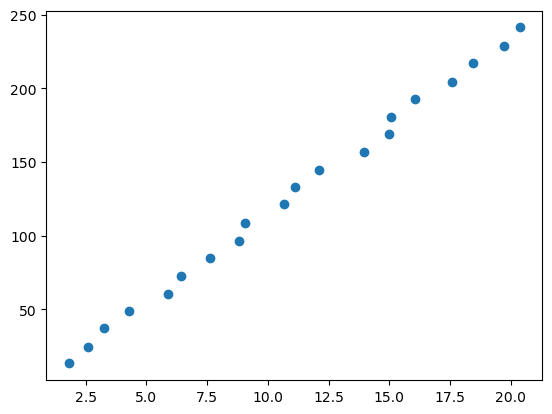

In [2]:
# Aca lo que hago es hacer un analisis exploratorio de los datos
# en el cual yo me doy cuenta que un modelo lineal sería apto
# para representar estos datos


import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,Y)
plt.show()

PASO 2: Creamos datos de entrenamiento
==

In [3]:
datos_entrenamiento = int(0.8 * len(X))
datos_entrenamiento
datos_prueba = len(X) - datos_entrenamiento
datos_prueba

4

In [4]:
X,Y

# Recordemos: nosotros tenemos dos conjuntos de datos:
#  *  Uno de entrenamiento
#  *  Uno de validación/ prueba/ testing
#
# Pero a todos estos datos los tengo que partir en 2
# Por lo general, la particion se hace en 80/ 20

# int() --> estoy casteando al número entero más cercano

datos_entrenamiento = int(0.8 * len(X))     # 80% entrenamiento
datos_prueba = len(X) - datos_entrenamiento # 20% validación

#ENTRENAMIENTO
# reshape: cambia la forma que tiene el vector, cambia las dimensiones
X_entrenamiento = X[:datos_entrenamiento].reshape((datos_entrenamiento, 1))
print(X_entrenamiento)
Y_entrenamiento = Y[:datos_entrenamiento].reshape((datos_entrenamiento, 1))
print(Y_entrenamiento)

#PRUEBA
X_prueba = X[datos_entrenamiento:].reshape((datos_prueba,1))
Y_prueba = Y[datos_entrenamiento:].reshape((datos_prueba,1))

[[ 1.81]
 [ 2.58]
 [ 3.26]
 [ 4.27]
 [ 5.89]
 [ 6.42]
 [ 7.62]
 [ 8.82]
 [ 9.05]
 [10.66]
 [11.11]
 [12.11]
 [13.95]
 [14.97]
 [15.08]
 [16.06]]
[[ 13.16]
 [ 24.56]
 [ 37.  ]
 [ 48.86]
 [ 60.63]
 [ 72.68]
 [ 84.99]
 [ 96.54]
 [108.85]
 [121.18]
 [133.  ]
 [144.63]
 [157.07]
 [168.92]
 [180.71]
 [193.04]]


PASO 3 - Realizamos regresión lineal.
==

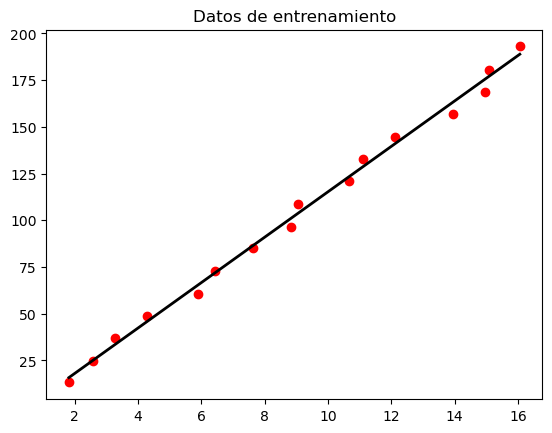

In [5]:
from sklearn import linear_model # Importamos el submodulo linear_model

# Creamos un objeto de regresión lineal
linear_regressor = linear_model.LinearRegression()     

# Ajustamos la regresión a los datos de entrenamiento
# fit lo que toma son los datos de entrenamiento x e y
# UNA VEZ QUE SE EJECUTA ESTA SENTENCIA, EL MODELO YA ESTÁ ENTRENADO
linear_regressor.fit(X_entrenamiento, Y_entrenamiento)

# Y a partir de datos de regresión encontrados
# predict hace las predicciones sobre el conjunto de entrenamiento+
# AHORA SE PUEDE HACER LAS PREDICCIONES
Y_predicha_de_entrenamiento = linear_regressor.predict(X_entrenamiento)

# Después se grafica todo 
import matplotlib.pyplot as plt

# La linea negra solida es nuestro modelo que aproxima nuestros datos
plt.figure()
plt.scatter(X_entrenamiento, Y_entrenamiento, color = 'red')
plt.plot(X_entrenamiento, Y_predicha_de_entrenamiento, color = 'black', linewidth = 2)
plt.title('Datos de entrenamiento')
plt.show()

>Una vez que visualizamos el ajuste podemos evaluar la correspondencia de la regresión con relación a los datos de prueba.

<function matplotlib.pyplot.show(close=None, block=None)>

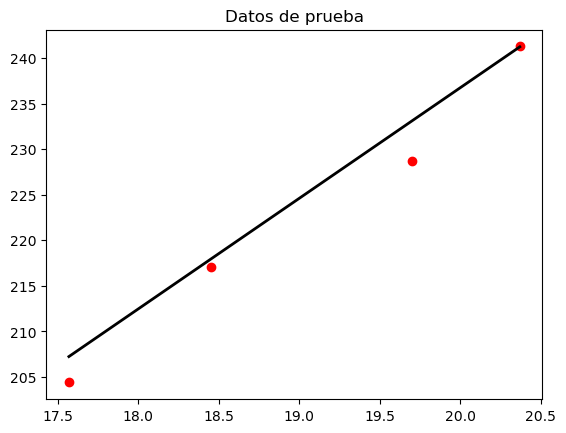

In [6]:
Y_predicha_de_prueba = linear_regressor.predict(X_prueba)
plt.figure()
plt.scatter(X_prueba, Y_prueba, color = 'red')
plt.plot(X_prueba, Y_predicha_de_prueba, color = 'black', linewidth=2)
plt.title('Datos de prueba')
plt.show

# Ahora me surge una pregunta: qué tan bueno es mi modelo?
# eso siempre está en el conjunto de validacion
# no deberia medir el modelo con los datos de entrenamiento
# Asi evaluo la capacidad de generalizacion de mi modelo (cuando hago
# validaciones sobre el conjunto de prueba)

Nada que ver <font color='red'>**text**</font>
___

Existen varias formas de evaluar una regresión lineal, y podemos utilizar nuevamente `scikit-learn`  para realizar esta tarea, mediante el módulo metrics según se muestra a continuación:   

Acá se presentan 5 métricas

>•	__Error absoluto medio:__ este es el promedio de errores absolutos de todos los puntos de datos en el conjunto de datos dado.

>•	__Error cuadrático medio:__ Este es el promedio de los cuadrados de los errores de todos los puntos de datos en el conjunto de datos dado. ¡Es una de las métricas más populares que hay!

>•	__Error absoluto mediano:__ Esta es la mediana de todos los errores en el conjunto de datos dado. La principal ventaja de esta métrica es que es robusta a los valores atípicos. Un único punto negativo en el conjunto de datos de prueba no distorsionaría la métrica de error completa, en lugar de una métrica de error promedio.

>•	__Puntuación de varianza explicada:__ esta puntuación mide qué tan bien nuestro modelo puede explicar la variación en nuestro conjunto de datos. **Una puntuación de 1.0 indica que nuestro modelo es perfecto.**

>•	__Puntuación R2:__ Se nombra como R cuadrado, y esta puntuación se refiere al coeficiente de determinación. Esto nos dice qué tan bien serán predichas las muestras desconocidas por nuestro modelo. **La mejor puntuación posible es 1.0, pero la puntuación también puede ser negativa.** Se relaciona con el coeficiente de Pearson.



In [7]:
import sklearn.metrics as sm

# El 2 es para redondear la salida de la función a 2 decimales ==> ayudo a la visualización
print("Error absoluto medio =", round(sm.mean_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación R2 =", round(sm.r2_score(Y_prueba, Y_predicha_de_prueba), 2))

Error absoluto medio = 2.02
Error cuadratico medio = 7.01
Error absoluto mediano = 1.83
Puntuación de varianza explicada = 0.98
Puntuación R2 = 0.96


Regresión contraída/ regresión de Ridge
==

Crea también un modelo lineal, pero más resistente a los errores. Ahí surge un area temática que se llaman regularizaciones. Permite eliminar puntos aislados (outliers)

Error absoluto medio = 1.49
Error cuadratico medio = 2.86
Error absoluto mediano = 1.49
Puntuación de varianza explicada = 0.98
Puntuación R2 = 0.98


<function matplotlib.pyplot.show(close=None, block=None)>

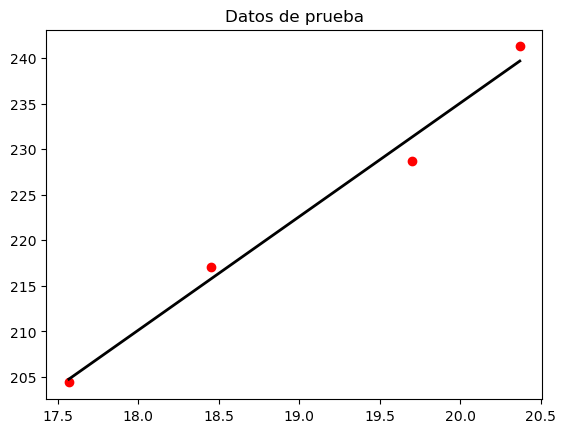

In [8]:
# Es una penalidad que ponemos sobre los puntos que tiene una desviación 
# muy grande para hacer el modelo más robusto.

from sklearn import linear_model

# alpha es el término de regularización. Cuantos más outliers tengo en mis datos ==> más fuerza le tengo que dar
# Le estoy diciendo que use un valor de 10k iteraciones
# La opcion fit_intercept busca el pto donde los datos intercectan el eje y y lo usa para el modelo
regresion_ridge = linear_model.Ridge(alpha = 0.01, fit_intercept = True, max_iter = 10000)
regresion_ridge.fit(X_prueba, Y_prueba)

Y_predicha_de_prueba = regresion_ridge.predict(X_prueba)


print("Error absoluto medio =", round(sm.mean_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación R2 =", round(sm.r2_score(Y_prueba, Y_predicha_de_prueba), 2))

plt.figure()
plt.scatter(X_prueba, Y_prueba, color='red')
plt.plot(X_prueba, Y_predicha_de_prueba, color = 'black', linewidth = 2)
plt.title('Datos de prueba')
plt.show

3.Clasificación - Regresión logística.
==
La regresión logística (Logistic Regression), a pesar de su nombre, es un modelo lineal para la clasificación en lugar de la regresión. 
Modelo para resolver problemas de clasificación binaria.

Paso 1
==
Comencemos por tomar una serie de puntos según se muestra a continuación y graficarlos como hemos aprendido a hacer hasta aquí.


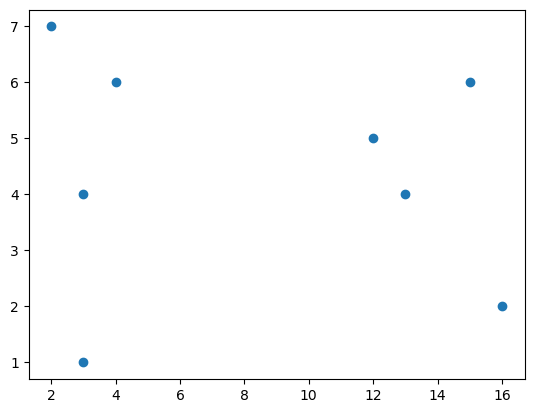

In [9]:
# Se arranca importando una serie de paquetes
import numpy as np
from sklearn import linear_model 
from sklearn import model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# En el ejemplo vamos a trabajar con estos datos
X = np.array([[16,2], [3,1], [2,7], [13,4], [3,4], [12,5], [15,6], [4,6]])

# los graficamos
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()


Paso 2
==
Dados los puntos de dispersión parecen existir dos grupos de datos, uno que se agrupa en torno al valor x = 3 y otro que se agrupa en torno al valor $x = 14$, lo que haremos es en base a esta hipótesis asignar a los valores cercanos a 3 el valor de cero y a los cercanos a catorce el valor de uno y agregaremos los valores en el mismo orden dentro del array Y.


In [10]:
# cada uno de estos puntos tiene una etiqueta asociada
# las etiquetas se corresponden con dos categorias binarias
Y = [1, 0, 0, 1, 0, 1, 1, 0]

Paso 3
==
Ahora utilizaremos el objeto clasificador “LogisticRegresion” y le pasaremos los datos que deseamos clasificar de forma de crear un modelo, haciendo que se ajuste mediante el uso de (fit)  


In [11]:
# ACA SE ENTRENA EL CLASIFICADOR
# se aplica la regresión logistica con LogisticRegression
# Antes creamos la clase clasificador
# C es la inversa del coeficiente de regulación! C = 1 / alpha
clasificador = linear_model.LogisticRegression(solver = 'lbfgs', C = 100)
clasificador.fit(X, Y)

LogisticRegression(C=100)

Paso 4
==
Con la clasificación realizada, utilizaremos el método predict() de forma de predecir como el modelo predice los propios valores pasados como datos. Este es un caso muy simple en el cual la predicción retorna exactamente los mismos valores, sin embargo en otros casos más complejos el ajuste no es del 100% y el modelo debe ser ajustado a medida que conocemos más la problemática del tema tratado. 


In [12]:
# Acá también tenemos un método predict
prediccion = clasificador.predict(X)
print(prediccion)

[1 0 0 1 0 1 1 0]


In [13]:
# nos da un score prefecto (100%)
print(clasificador.score(X,Y))

1.0


Paso 5
==
Ahora en base a otros datos recopilados podemos ver como el modelo predice al grupo al cual deberían pertenecer los datos.


In [14]:
Xn = np.array([[6,4], [20,7], [4,17]])
Yn = clasificador.predict(Xn)
print(Yn)

[0 1 0]


Paso 6
==
Siempre es mejor tratar de visualizar los datos para tener una mejor comprensión del tema, por lo que vamos a graficar los datos asignando como colores las opciones de ceros o unos de la clasificación (c=Y). 


In [15]:
# graficamos los puntos del paso 5 para ver cómo se ven.
# pero antes creo una malla donde haya muchos puntos espaciados entre sí, y clasificar los puntos del espacio

# lo formamos concatenando los datos de entrenamiento con los de validación
Xs = np.concatenate((X, Xn), axis = 0)
Ys = np.append(Y , Yn)

# delimitamos el espacio
# setteo los límites de la cuadrícula
x_min, x_max = min(Xs[:, 0]) - 1.0, max(Xs[:, 0]) + 1.0
y_min, y_max = min(Xs[:, 1]) - 1.0, max(Xs[:, 1]) + 1.0


Dado ahora los puntos de los ejes x e y crearemos a partir de ellos una malla de puntos lo cual es en la practica una cuadricula rectangular creada a partir de los datos. 

In [16]:
step_size = 0.01

# meshgrid: cuadriculamos todo el espacio en un monton de puntos
# creamos un rango desde un x min a un x más
valor_x, valor_y = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# ravel es un método propio que nos entrega la matriz, que es ponerla en forma de filas. Aplasta la matriz y nos da un vector
# con el c_ lo que estamos haciendo es crear columnas
malla_de_puntos = clasificador.predict(np.c_[valor_x.ravel(), valor_y.ravel()])


Aquí estamos utilizando el método ravel() de forma de crear una copia de los valores originales. También podríamos haber utilizado el método flatten(), la diferencia entre ambos son: 
>__ravel ():__ Retorna una referencia a la matriz original, si se modifica la matriz, el valor de la matriz original también cambia. ravel() es más rápido que flatten().

>__flatten ():__ Retorna una copia de la matriz original, si se modifica algún valor de esta matriz, el valor de la matriz original no se verá afectado. Ocupa un nuevo espacio de memoria

Tambien notar que estamos utilizando np.c_, para obtener los datos por pares x, y ya que dada una matriz  nos retorna sus valores por columnas. 


Paso 7 
==
Creamos un mapa de color a partir de los datos anteriores mediante pcolormesh() :


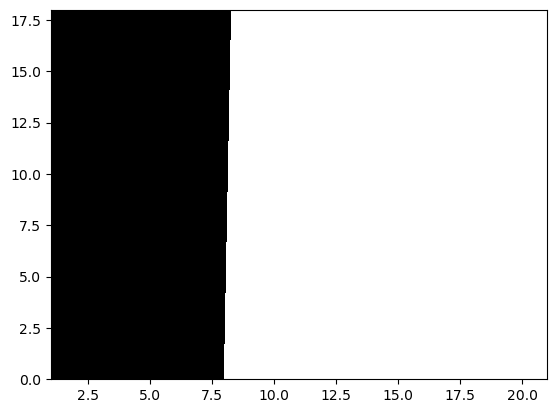

In [17]:
# graficamos lo anteriormente mencionado
malla_de_puntos = malla_de_puntos.reshape(valor_x.shape) # podríamos tmb poner valor_y.shape
plt.figure()

# colormesh me colorea, le tenemos que pasar la malla de puntos y un mapa de colores
plt.pcolormesh(valor_x, valor_y, malla_de_puntos, cmap = plt.cm.gray, shading = 'auto')


Paso 8
==
Finalmente podemos poner sobre un gráfico todos los puntos tanto los de entrenamiento como los de testeo y comprobar que el modelo a separado correctamente los valores:


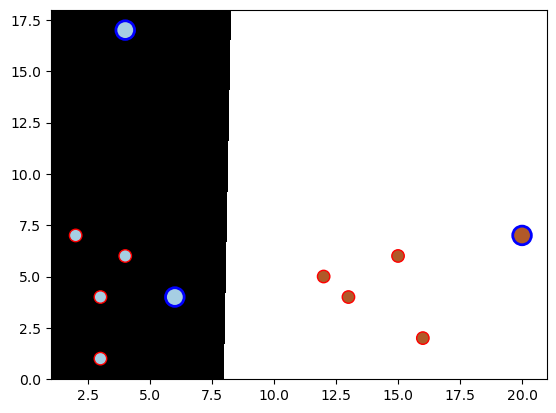

In [18]:
# graficamos sobre ese espacio los puntos que nos interesan
malla_de_puntos = malla_de_puntos.reshape(valor_x.shape)
plt.figure()
plt.pcolormesh(valor_x, valor_y, malla_de_puntos, cmap = plt.cm.gray, shading = 'auto')
plt.scatter(X[:, 0], X[:, 1], c = Y, s=80, edgecolors = 'red', linewidth = 1, cmap = plt.cm.Paired)
plt.scatter(Xn[:, 0], Xn[:, 1], c = clasificador.predict(Xn), s = 180, edgecolors = 'blue', linewidth = 2, cmap = plt.cm.Paired)
 
plt.show()

# los puntos de entrenamiento son los chiquitos
# se ve el límite de decisión


EJEMPLO RESHAPE()
==

[[  0.     31.875  63.75 ]
 [ 95.625 127.5   159.375]
 [191.25  223.125 255.   ]]


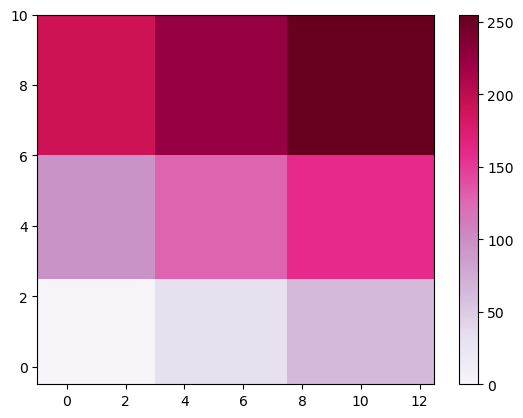

In [19]:
x = np.array([1, 5, 10])
y = np.array([1, 4, 8])
z = np.linspace(0, 255, 9).reshape(3, 3)
print(z)
plt.pcolormesh(x, y, z, cmap = "PuRd", shading ='auto'); #cmap = "PuRd");
plt.colorbar();